In [4]:
apa_yang_dibahas ={1: "Data",
                    2: "bikin model",
                    3: "Fitting Modelnya ke training data",
                    4: "Evaluasi modelnya bikin prediksi",
                    5: "save dan load modelnya"}

In [5]:
print(apa_yang_dibahas)

{1: 'Data', 2: 'bikin model', 3: 'Fitting Modelnya ke training data', 4: 'Evaluasi modelnya bikin prediksi', 5: 'save dan load modelnya'}


Creating Dataset With Linear Regression

ML Tip:
1. Get data into numerical representation.
2. Build a model to learn patterns in that numerical representation.

Import Dependencies/Frameworks

In [6]:
import torch
from torch import nn
import matplotlib.pyplot as plt

torch.__version__

'2.0.1'

Data Preparing and loading

We'll use a linear regression formula to make a straight line with known parameters.

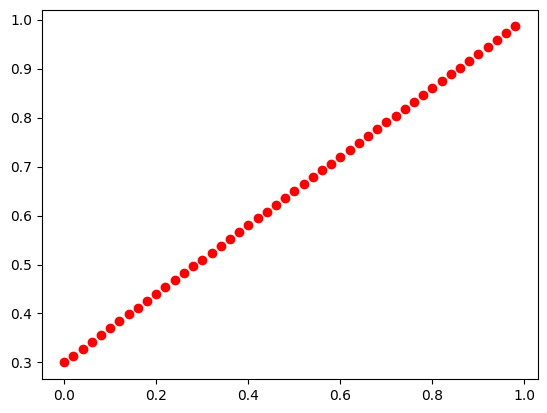

In [7]:
weight = 0.7
bias = 0.3

start = 0
end = 1

step = 0.02

x = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * x + bias

plt.plot(x, y, 'ro')

Splitting data into training and testing data

In [8]:
len(x), len(y)

(50, 50)

In [9]:
#1 create train, test, split
train_split = int(0.8 * len(x))
X_train, y_train = x[:train_split], y[:train_split]
X_test, y_test = x[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

Visualize

In [10]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
    
    plt.figure(figsize=(10, 7))

    plt.scatter(train_data, train_labels, c='b', s=4, label='Training data')

    plt.scatter(test_data, test_labels, c='g', s=4, label='Testing data')

    if predictions is not None:
        plt.scatter(test_data, predictions, c='r', s=4, label='Predictions')

    plt.legend(prop={'size': 14})

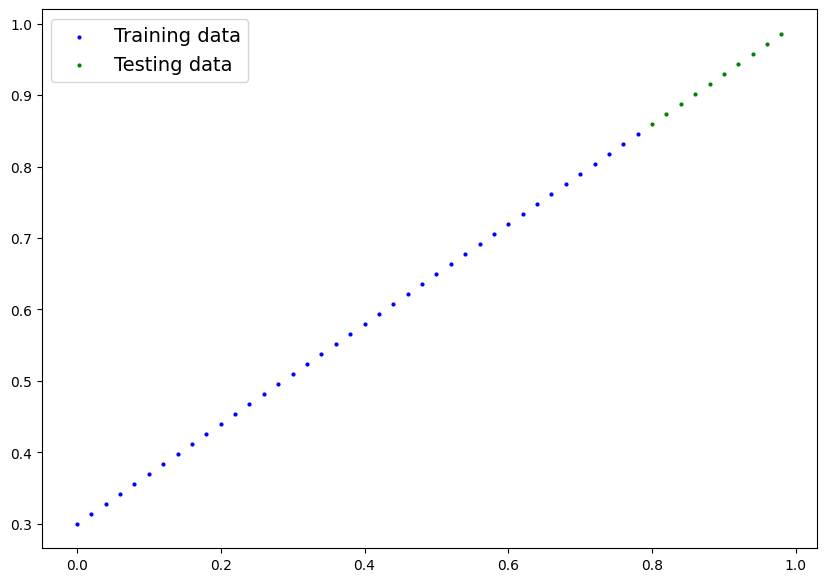

In [11]:
plot_predictions()

Create a Model
What the model does:
* Start With Random Weights and Biases
* Look at the training data and adjust the weights and biases slightly to make better predictions

How does it do so?
Through two main algorithms:
1. Gradient Descent
2. Backpropagation

In [12]:
#create linear regression model class
class LinearRegression(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1,
                                                requires_grad=True,
                                                dtype=torch.float))
        self.bias = nn.Parameter(torch.randn(1,
                                             requires_grad=True,
                                             dtype=torch.float))
        
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return x * self.weights + self.bias

Checking Content of the Model

In [16]:
#create random seed
torch.manual_seed(51)

#instantiate model
model0 = LinearRegression()

#Check The Models
list(model0.parameters())

[Parameter containing:
 tensor([1.0419], requires_grad=True),
 Parameter containing:
 tensor([-0.7777], requires_grad=True)]

In [17]:
#making predictions
with torch.inference_mode():
    preds0 = model0(X_test)

preds0

tensor([[0.0558],
        [0.0767],
        [0.0975],
        [0.1183],
        [0.1392],
        [0.1600],
        [0.1809],
        [0.2017],
        [0.2225],
        [0.2434]])

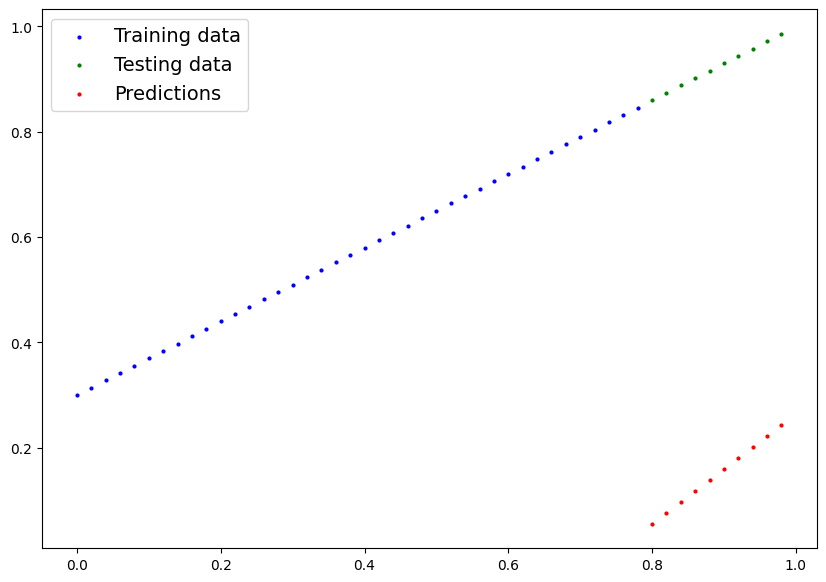

In [18]:
plot_predictions(predictions=preds0)